In [3]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

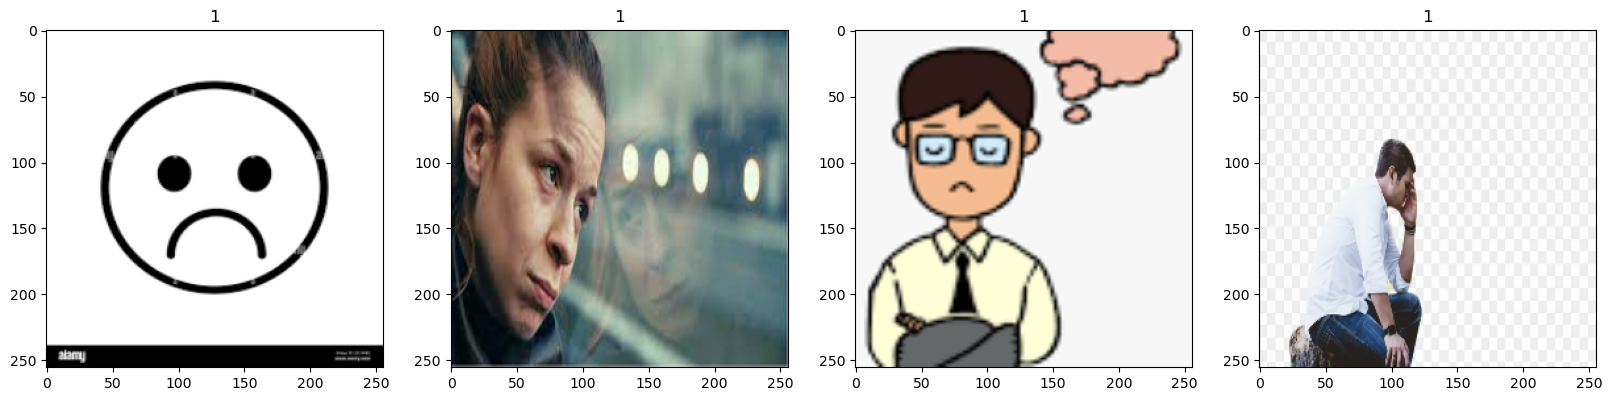

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
data = data.map(lambda x,y: (x/255, y))

In [9]:
data.as_numpy_iterator().next()

(array([[[[0.02331495, 0.01939338, 0.00370711],
          [0.04571078, 0.03002451, 0.0182598 ],
          [0.05892549, 0.04716079, 0.02755295],
          ...,
          [0.04313726, 0.06666667, 0.06666667],
          [0.04283711, 0.05852338, 0.07028808],
          [0.03529412, 0.05251225, 0.06427696]],
 
         [[0.05690583, 0.04121955, 0.02945485],
          [0.05223652, 0.03655025, 0.02478554],
          [0.05900735, 0.04724265, 0.0276348 ],
          ...,
          [0.04313726, 0.06666667, 0.06666667],
          [0.04683239, 0.06251867, 0.07428338],
          [0.03534917, 0.05256731, 0.06433202]],
 
         [[0.0836397 , 0.06403186, 0.05226716],
          [0.04712058, 0.0314343 , 0.0196696 ],
          [0.04808948, 0.04416791, 0.02456007],
          ...,
          [0.04024634, 0.06377576, 0.06377576],
          [0.04705882, 0.0627451 , 0.07450981],
          [0.03953211, 0.05675025, 0.06851496]],
 
         ...,
 
         [[0.04947917, 0.0573223 , 0.03771446],
          [0.04963

In [10]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [17]:
logdir='logs'

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 10s 1s/step - loss: 0.8935 - accuracy: 0.5089 - val_loss: 0.6819 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6830 - accuracy: 0.5402 - val_loss: 0.6541 - val_accuracy: 0.5625
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.6350 - accuracy: 0.6205 - val_loss: 0.6061 - val_accuracy: 0.5938
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.5849 - accuracy: 0.7411 - val_loss: 0.5515 - val_accuracy: 0.7344
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.5469 - accuracy: 0.7366 - val_loss: 0.4474 - val_accuracy: 0.8594
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.4832 - accuracy: 0.7991 - val_loss: 0.3811 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.3664 - accuracy: 0.8973 - val_loss: 0.4022 - val_accuracy: 0.7500
Epoch 8/20
7/7 [=====================

In [21]:
import cv2

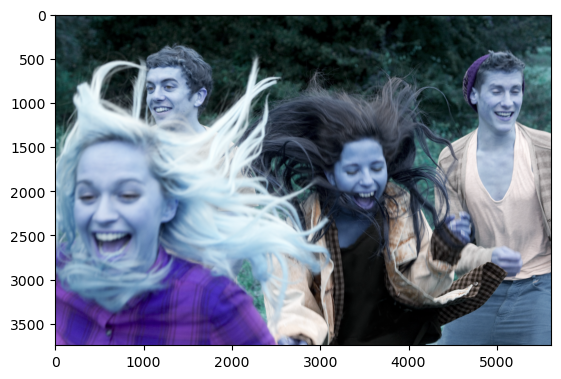

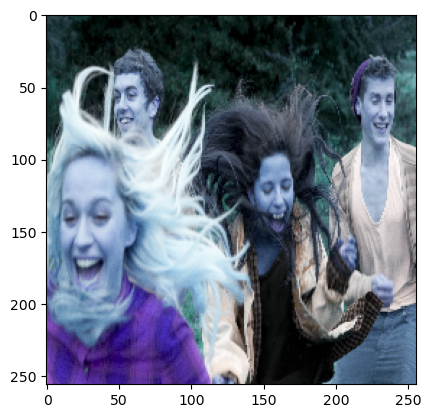

1/1 [==============================] - 0s 33ms/step
Predicted class is Happy


In [23]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')